# Week 1 - The What Why and when of Machine Learning
Main idea is follow that notebook in order to have and aproach or idea of wath we want, this doesn't means that you only have to answer to the questions or implement code. Feel free to add all the interesting content that you want to show in your final slides.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn style
sns.set_style("whitegrid")

# Input data files are available in the "../input/" directory.
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))



ImportError: No module named pandas

# 1. Data import and first impressions

### 1.1 Load dataset and take an overview.
Objectives:
* Load the dataset
* Know something about the dataset

In [2]:
# Import the data from the dataset
train_data = pd.read_csv('../input/train.csv',index_col='PassengerId')
test_data = pd.read_csv('../input/test.csv',index_col='PassengerId')


n = random.randint(1,9)
# ToDO 1: Show the fist n entries of the table
print(train_data[:n])
# ToDo 2: Rename the attributes with a fancy name
print(train_data.columns)

# Todo 3:How many people die/survive from dataset

NameError: name 'pd' is not defined

### 1.2 Plot the data
Objectives:
* Divide the features in two categories: numerical and categorical.
* Represent each one of the features with one plot

#### Numerical
- How many kids survived to the accident?
- Pclass is important?
- Witch is the biggest cabin number?
- Witch is the proportion depending on the Fare of the passengers?

Try to show multiple plots using the :
```
fig = plt.figure(figsize=(18,18))
```
```
sns.distplot(train_data[column].dropna(),ax=plt.subplot(221));
```

In [3]:
# Example Survived/Age
sns.distplot(train_data["Age"].dropna());
# X-axis Label
plt.xlabel('Survived or Not Survived?', fontsize=14);
# Y-axis Label
plt.ylabel("Age", fontsize=14);
# Printing Chart
plt.show()

NameError: name 'sns' is not defined

#### Categorical
- How many woman/man died?
- Where embarked the max number of people?
- How many johns are in the boat?
- How many embarked places exist?
- Name repetitions

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


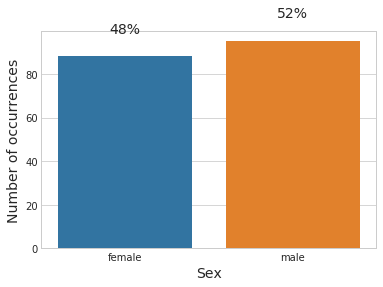

In [4]:
ax = sns.countplot(x="Sex", data=train_data.dropna());
# X-axis Label
plt.xlabel("Sex", fontsize=14);
# Y-axis Label
plt.ylabel('Number of occurrences', fontsize=14)
# Setting Legend location 
plt.legend(loc=1);

### Adding percents over bars
# Getting heights of our bars
height = [p.get_height() if p.get_height()==p.get_height() else 0 for p in ax.patches]
# Counting number of bar groups 
ncol = int(len(height)/2)
# Counting total height of groups
total = [height[i] + height[i + ncol] for i in range(ncol)] * 2
# Looping through bars
for i, p in enumerate(ax.patches):   
    # Adding percentages   
    ax.text(p.get_x()+p.get_width()/2, height[i]*1.01 + 10,
        '{:1.0%}'.format(height[i]/total[i]), ha="center", size=14) 
    

### 1.3 Fill missing data
Objectives:
* How to fill missing data
    Ex: Missing Embarked can be filled depending on the Fare?¿
* Take conclusion of its important or not fill this data.


In [5]:
# Non-null data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
